# Lec 55

Summary: Intro to Hierarchial clustering. Diff bw KMeans and Hierarchial Techniques and it's adv and disadv

Next Lec: 1 Numerical example to do heirarchial clustering

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
from scipy.cluster.hierarchy import fcluster
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

In [2]:
data = pd.read_excel('hierarchial_clustering.xlsx')
data

,Variable 1,Variable 2
0,2.00,2.0
1,5.50,4.0
2,5.00,5.0
3,1.50,2.5
4,1.00,1.0
5,7.00,5.0
6,5.75,6.5


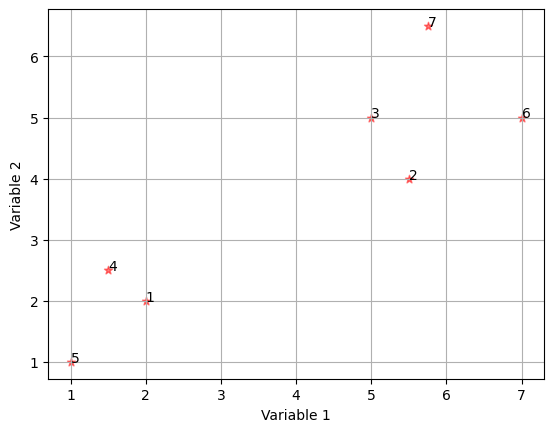

In [3]:
x = data['Variable 1']
y = data['Variable 2']
n = range(1,8)

fig, ax = plt.subplots()
ax.scatter(x,y,marker='*', c='red', alpha=0.5)
plt.grid()
plt.xlabel("Variable 1")
plt.ylabel("Variable 2")
for i, txt in enumerate(n):
    ax.annotate(txt, (x[i],y[i]))

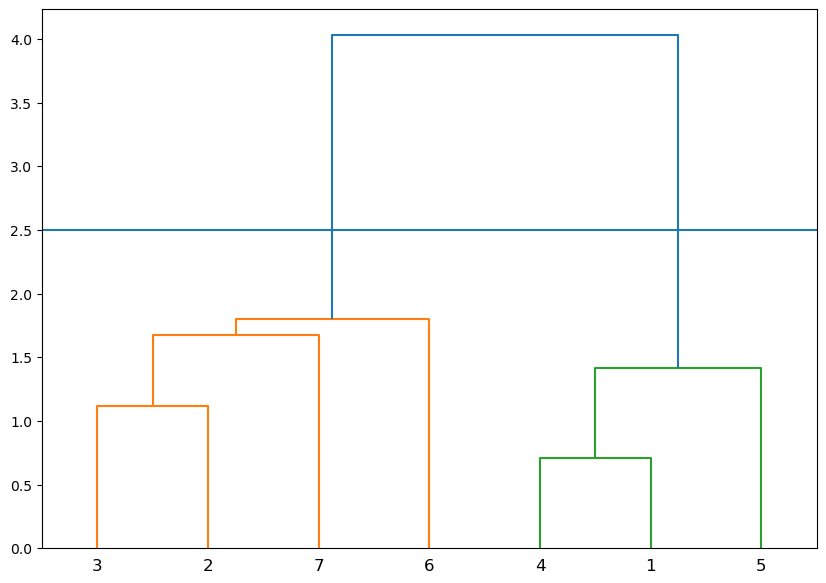

In [4]:
from scipy.cluster.hierarchy import dendrogram, linkage

linked = linkage(data, 'single') # we will have single linkage
labelList = range(1,8) # 

plt.figure(figsize=(10,7))
# dendrogram(linked, orientation='top',labels = labelList, distance_sort='descending', show_leaf_counts = True) # show error
dendrogram(linked, orientation='top',labels = labelList, distance_sort='descending')
plt.axhline(y=2.5)
plt.show()

In [5]:
import sklearn 
from sklearn.cluster import AgglomerativeClustering 

k=2 # one is 0 group and other is 1 group
# k=3
# Hclustering = AgglomerativeClustering(n_cluster=k, affinity='euclidean', linkage='single')
Hclustering = AgglomerativeClustering(k, affinity='euclidean', linkage='single') # euclidean distance with a single linkage
Hclustering.fit(data)

d:\Anaconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


AgglomerativeClustering(affinity='euclidean', linkage='single')

In [6]:
Hclustering.fit_predict(data)

d:\Anaconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([1, 0, 0, 1, 1, 0, 0], dtype=int64)

In [7]:
print(Hclustering.labels_) # labels as per group 0 and 1 from value of k=2

[1 0 0 1 1 0 0]


TypeError: cannot unpack non-iterable numpy.float64 object

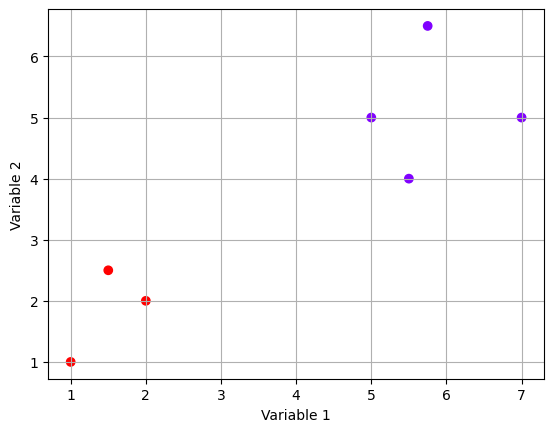

In [9]:
# graph is correct but throwing error
x = data['Variable 1']
y = data['Variable 2']
n = range(1,8)

fig,ax = plt.subplots()
ax.scatter(x,y,c = Hclustering.labels_, cmap='rainbow')
plt.grid()
plt.xlabel("Variable 1")
plt.ylabel("Variable 2")
for i, txt in enumerate(n):
    ax.annotate(x[i], y[i])

Started with agglomerative hierarchial algorithm with numerical example. In that eg., we found distance matrix, after finding distance matrix we formed a cluster wherever there is a minimum valueis there we connected that 2 objects then we updated the distance matrix again we have gone to where there is a minimum point is there, so that point and that objects are clubbed together. At the end, for the same dataset we have done python programming.